In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')


In [3]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

In [4]:
anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

In [5]:
from cds import plotting

In [6]:
my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.002101637051678442
p-value for MAD2L1: 9.701409442247343e-06


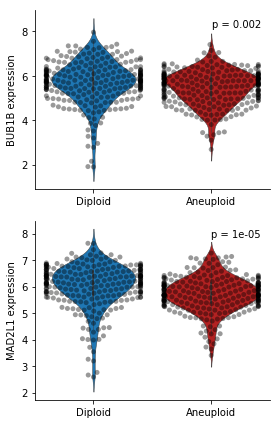

In [8]:
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'





sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B expression')
axx[1].set_ylabel('MAD2L1 expression')



from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'BUB1B (701)'],public_19Q4_proteincoding_tpm.loc[falsee,'BUB1B (701)'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm.loc[falsee,'MAD2L1 (4085)'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)





plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()

#plt.savefig('fig2b/expression.pdf')

In [9]:
# get p-values

shared = set(anot.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


from scipy import stats
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'BUB1B (701)'],public_19Q4_proteincoding_tpm.loc[falsee,'BUB1B (701)'])
print('Genne expression p-value for BUB1B: ' + str(p_val))
tt,p_val = stats.ttest_ind(public_19Q4_proteincoding_tpm.loc[trus,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm.loc[falsee,'MAD2L1 (4085)'])
print('Genne expression p-value for MAD2L1: ' + str(p_val))




Genne expression p-value for BUB1B: 0.002101637051678442
Genne expression p-value for MAD2L1: 9.701409442247343e-06


In [10]:
## now do fig 2c

In [7]:
from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

In [23]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



In [8]:
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.26378027093402934        p = 0.0003888401638310891
MAD2L1 dependency and expression : r = 0.40381940443136033        p = 2.495226526206009e-08


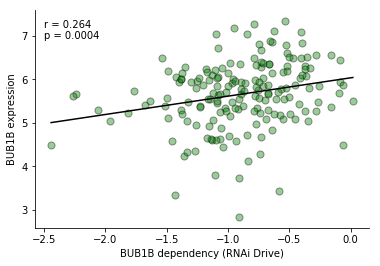

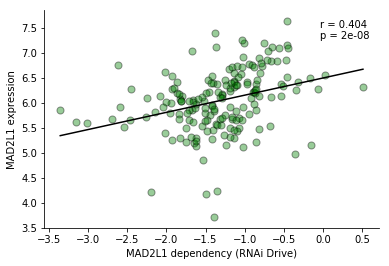

In [10]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_drive_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_drive_SPEARMAN.pdf')



No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.3613985870208916        p = 2.7696239226739648e-08
MAD2L1 dependency and expression : r = 0.31164662893518275        p = 2.07006029653576e-06


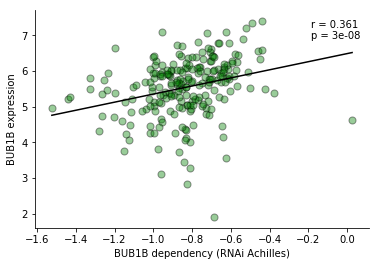

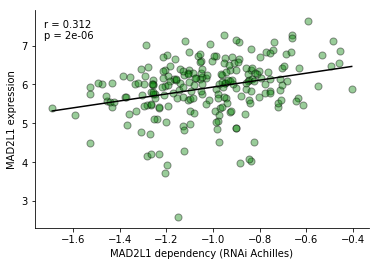

In [12]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_achilles.index) 
without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Achilles)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_achilles_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Achilles)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_achilles_SPEARMAN.pdf')




In [13]:
import scipy
r,p = scipy.stats.pearsonr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))

r,p = scipy.stats.pearsonr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))

BUB1B dependency and expression : r = nan        p = 1.0
MAD2L1 dependency and expression : r = nan        p = 1.0


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [14]:
##### make fig2c

In [98]:
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

In [99]:
sample_info.index = sample_info.loc[:,'CCLE_Name'] 

In [100]:
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

In [19]:
bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

In [24]:
shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

In [25]:
#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'gastric' \
        and drive_box.loc[x,'lineage'] != 'colorectal' and drive_box.loc[x,'lineage'] != 'uterus' \
        and drive_box.loc[x,'lineage'] != 'skin' and drive_box.loc[x,'lineage'] != 'ovary' \
        and drive_box.loc[x,'lineage'] != 'lung'  and drive_box.loc[x,'lineage'] != 'bone':
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)

In [26]:
from collections import Counter
pd.Series(Counter(drive_box.loc[:,'lineage'])).sort_values()

bile_duct                     3
thyroid                       4
prostate                      6
urinary_tract                 8
bone                          8
liver                        11
peripheral_nervous_system    11
plasma_cell                  12
kidney                       12
soft_tissue                  14
upper_aerodigestive          14
esophagus                    19
pancreas                     20
skin                         20
uterus                       23
gastric                      23
breast                       25
central_nervous_system       30
ovary                        31
colorectal                   31
fibroblast                   34
lymphocyte                   35
blood                        53
lung                         89
dtype: int64

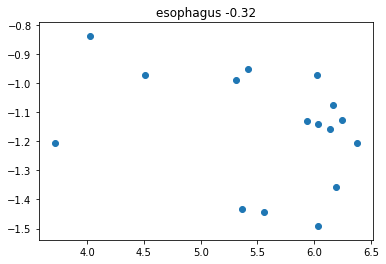

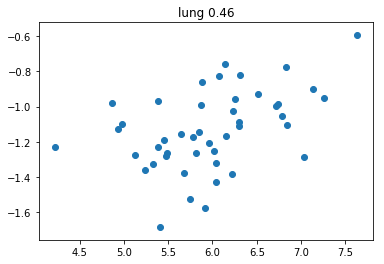

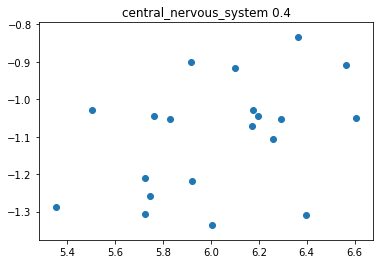

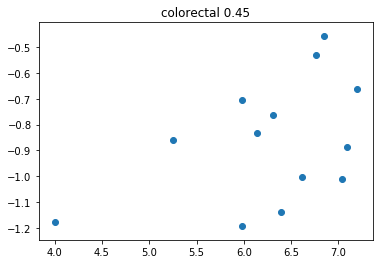

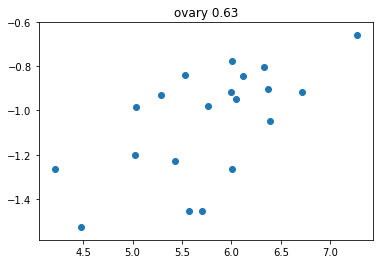

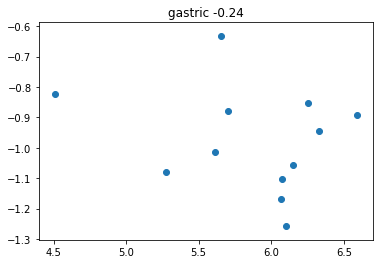

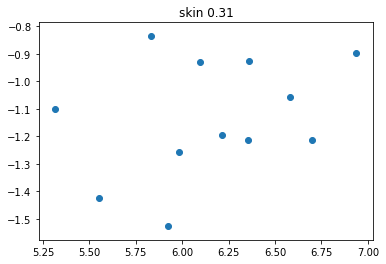

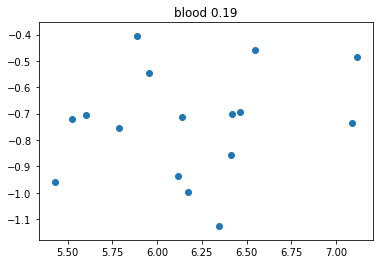

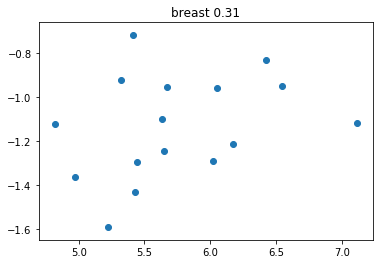

<Figure size 432x288 with 0 Axes>

In [71]:
#rnai achilles

for  l in list(set(sample_info.loc[:,'lineage'])):
    lines = set(sample_info[sample_info.loc[:,'lineage'] == l].index) & set(gene_effect_rnai_achilles.index) & set(public_19Q4_proteincoding_tpm_.index)
    if len(lines) < 10:
        continue
    plt.scatter(public_19Q4_proteincoding_tpm_.loc[lines,'MAD2L1 (4085)'],gene_effect_rnai_achilles.loc[lines,'MAD2L1 (4085)'])
    plt.title(l + " " + str(round(public_19Q4_proteincoding_tpm_.loc[lines,'MAD2L1 (4085)'].corr(gene_effect_rnai_achilles.loc[lines,'MAD2L1 (4085)']),2)))
    
    plt.figure()

In [268]:
from collections import Counter
pd.Series(Counter(sample_info.loc[drive_box.index,'lineage'])).sort_values().iloc[-14:]

soft_tissue               14
esophagus                 19
skin                      20
pancreas                  20
uterus                    23
gastric                   23
breast                    25
central_nervous_system    30
colorectal                31
ovary                     31
fibroblast                34
lymphocyte                35
blood                     53
lung                      89
dtype: int64

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

breast_Aneuploid v.s. breast_Diploid: t-test independent samples, P_val=7.611e-02 stat=-1.857e+00
skin_Aneuploid v.s. skin_Diploid: t-test independent samples, P_val=5.319e-01 stat=6.374e-01
uterus_Aneuploid v.s. uterus_Diploid: t-test independent samples, P_val=2.075e-01 stat=-1.300e+00
gastric_Aneuploid v.s. gastric_Diploid: t-test independent samples, P_val=2.092e-01 stat=-1.295e+00
soft_tissue_Aneuploid v.s. soft_tissue_Diploid: t-test independent samples, P_val=3.933e-01 stat=-8.855e-01
central
nervous
system_Aneuploid v.s. central
nervous
system_Diploid: t-test independent samples, P_val=8.118e-01 stat=-2.403e-01
lung_Aneuploid v.s. lung_Diploid: t-test independent samples, P_val=8.839e-01 stat=1.464e-01
blood_Aneuploid v.s. blood_Diploid: t-test independent samples, P_val=6.412e-01 stat=-4.688e-01
ovary_Aneuploid v.s.

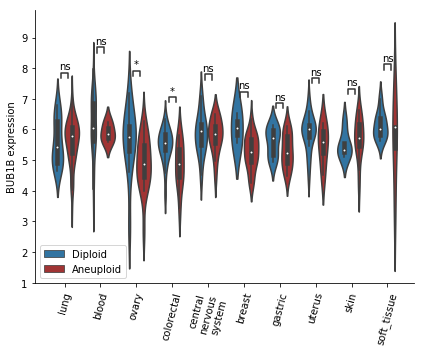

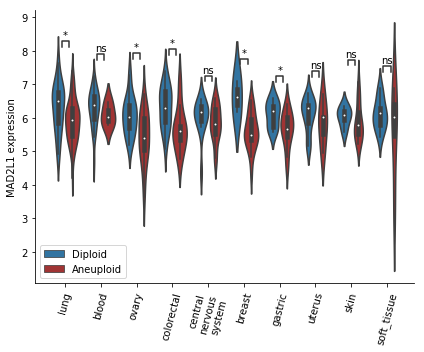

In [269]:
###### most abundant lineages


shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]#gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'lung' \
        and drive_box.loc[x,'lineage'] != 'blood' and drive_box.loc[x,'lineage'] != 'gastric' \
        and drive_box.loc[x,'lineage'] != 'uterus' and drive_box.loc[x,'lineage'] != 'ovary' \
        and drive_box.loc[x,'lineage'] != 'colorectal'  and drive_box.loc[x,'lineage'] != 'central_nervous_system' \
        and drive_box.loc[x,'lineage'] != 'breast' and drive_box.loc[x,'lineage'] != 'skin' and drive_box.loc[x,'lineage'] != 'soft_tissue':
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['lung','blood','ovary','colorectal','central\nnervous\nsystem','breast','gastric','uterus','skin','soft_tissue' ]
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B expression')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('review_plots/lineages_violin_BUB1B_expression_revision_10_NEW.pdf')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid"))
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 expression')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('review_plots/lineages_violin_MAD2L1_expression_revision_10_NEW.pdf')



#lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

In [14]:
# look at protein data 


protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')

In [15]:
protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]

In [16]:
protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T

In [188]:
protein_quant_current_normalized.loc[:,'MAD2L1']
#gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']

MDAMB468_BREAST                               -0.458954
SH4_SKIN                                      -0.111915
AU565_BREAST                                  -0.175593
KMRC1_KIDNEY                                   0.012363
CAL51_BREAST                                   0.129418
                                                 ...   
FADU_UPPER_AERODIGESTIVE_TRACT                -0.959653
KP4_PANCREAS                                  -0.937428
MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.086685
OVCAR8_OVARY                                   0.723332
THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE       -0.447222
Name: MAD2L1, Length: 378, dtype: float64

In [192]:
#protein_quant_current_normalized.loc[protein_quant_current_normalized.index[protein_quant_current_normalized.index.duplicated()]]

In [17]:
protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.26126871950133174
p-value for MAD2L1: 0.0012271722567593916


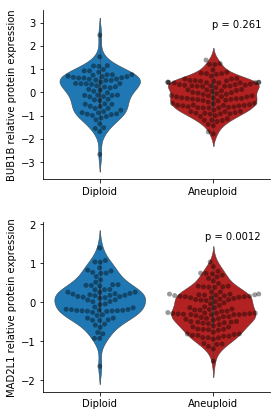

In [38]:
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index)
temp = protein_quant_current_normalized.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'




sns.violinplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B relative protein expression')
axx[1].set_ylabel('MAD2L1 relative protein expression')



from scipy import stats
tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'BUB1B'],protein_quant_current_normalized.loc[falsee,'BUB1B'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'MAD2L1'],protein_quant_current_normalized.loc[falsee,'MAD2L1'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)





plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()

plt.savefig('review_plots/relative_protein_expression_revision_NEW.pdf')


In [39]:
protein_quant_current_normalized_ = protein_quant_current_normalized.loc[:,['BUB1B','MAD2L1']]

In [40]:
# want to regress out lineage first from the expression data

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[protein_quant_current_normalized.index,'lineage'])
mu = protein_quant_current_normalized_.mean()
reg = LinearRegression().fit(one_hot, protein_quant_current_normalized_)
preds = pd.DataFrame(reg.predict(one_hot),index = protein_quant_current_normalized_.index,columns = protein_quant_current_normalized_.columns)

preds_ = preds 
corrected_protein = ((protein_quant_current_normalized_  - mu)- preds_)+ mu




/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.523804002726536
p-value for MAD2L1: 0.3970578717473402


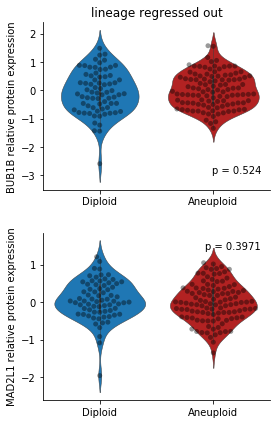

In [42]:
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot_CCLE.index) & set(corrected_protein.index)
temp = corrected_protein.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'




sns.violinplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B relative protein expression')
axx[1].set_ylabel('MAD2L1 relative protein expression')



from scipy import stats
tt,p_val = stats.ttest_ind(corrected_protein.loc[trus,'BUB1B'],corrected_protein.loc[falsee,'BUB1B'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(corrected_protein.loc[trus,'MAD2L1'],corrected_protein.loc[falsee,'MAD2L1'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)


axx[0].set_title('lineage regressed out')


plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()

plt.savefig('review_plots/relative_protein_expression_revision_lineage_controlled_NEW.pdf')


No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.14399236335709414        p = 0.015709570569801202
MAD2L1 dependency and expression : r = 0.23999502428365901        p = 4.809875577189081e-05


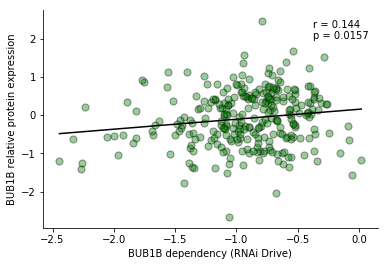

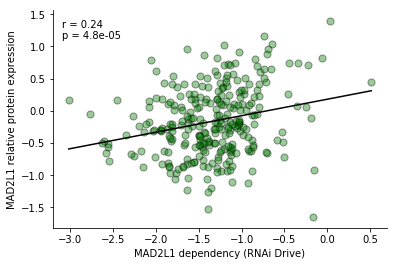

In [18]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B relative protein expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('review_plots/bub1b_protein_exp_dep_rnai_drive_revision_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 relative protein expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



plt.savefig('review_plots/mad2l1_protien_exp_dep_rnai_drive_revision_SPEARMAN.pdf')




In [199]:
gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'].corr(protein_quant_current_normalized.loc[without_na,'MAD2L1'])

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


0.3337692228208568

No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.1086449383190131        p = 0.08647431531960485
MAD2L1 dependency and expression : r = 0.25749570393126286        p = 3.777916219837668e-05


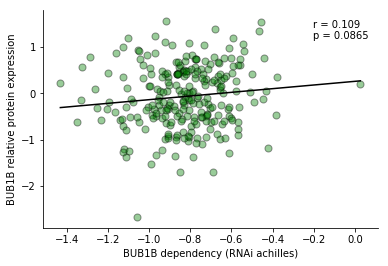

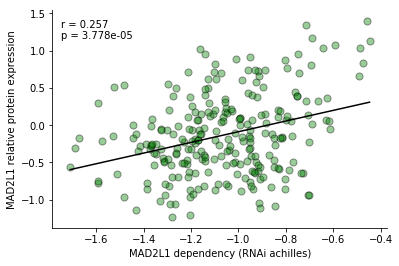

In [19]:

#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_achilles.index) 
without_na = shared#gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi achilles)')
plt.ylabel('BUB1B relative protein expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('review_plots/bub1b_protein_exp_dep_rnai_achilles_revision_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi achilles)')
plt.ylabel('MAD2L1 relative protein expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



plt.savefig('review_plots/mad2l1_protien_exp_dep_rnai_achilles_revision_SPEARMAN.pdf')





In [352]:
#len(protein_quant_current_normalized.index & gene_effect_rnai_achilles.index)
drive_box.loc['SW780_URINARY_TRACT','lineage']

'urinary_tract'

'urinary_tract'

In [342]:

bone = sample_info[sample_info.loc[:,'lineage'] == 'bone'].index
breast = sample_info[sample_info.loc[:,'lineage'] == 'breast'].index
colon = sample_info[sample_info.loc[:,'lineage'] == 'colorectal'].index
lung = sample_info[sample_info.loc[:,'lineage'] == 'lung'].index
ovary = sample_info[sample_info.loc[:,'lineage'] == 'ovary'].index

shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]#gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    print(x)
    if  drive_box.loc[x,'lineage'] != 'uterus' \
        and drive_box.loc[x,'lineage'] != 'ovary' and drive_box.loc[x,'lineage'] != 'skin' \
        and drive_box.loc[x,'lineage'] != 'gastric' and drive_box.loc[x,'lineage'] != 'colorectal' \
        and drive_box.loc[x,'lineage'] != 'central_nervous_system' :
            to_drop.append(x)
            
# drive_box_ = drive_box.drop(to_drop)
# drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

# lin_order = ['uterus','ovary','skin','gastric','colorectal','central\nnervous\nsystem']
# ##########################################################################################################
# l_order = list(set(drive_box_.loc[:,'lineage']))

# plt.subplots(figsize=(6,5))

# ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
#                      data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

# new_pairs = []

# for lin in set(drive_box_['lineage'].values):
#     #print(lin)
#     new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# # box_pairs=[
# #     (("skin", "Diploid"), ("skin", "Aneuploid")),
# #     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
# #     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
# #     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
# #     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
# #     (("lung", "Diploid"), ("lung", "Aneuploid")),
# #     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
# #     ]
# width = 0.4
# add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
#                     box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




# plt.xticks(rotation=75) 
# plt.ylabel('BUB1B expression')
# plt.xlabel('')


# plotting.simpleaxis(ax)
# handles, labels = ax.get_legend_handles_labels()

# ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
# plt.tight_layout()
# #plt.savefig('fig2d/lineages_violin_BUB1B_rnai_drive.pdf')


# plt.subplots(figsize=(6,5))

# ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
#                      data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid"))
#     ]
# width = 0.4
# add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
#                     box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


# plt.xticks(rotation=75) 
# plt.ylabel('MAD2L1 expression')
# plt.xlabel('')


# plotting.simpleaxis(ax)
# handles, labels = ax.get_legend_handles_labels()

# ax.legend(handles=handles[0:], labels=labels[0:])
# plt.tight_layout()
# #plt.savefig('fig2d/lineages_violin_MAD2L1_rnai_drive.pdf')



# lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

SW780_URINARY_TRACT
TC32_BONE
U118MG_CENTRAL_NERVOUS_SYSTEM
MSTO211H_PLEURA
EJM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
KARPAS422_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
LOVO_LARGE_INTESTINE
NCIH2073_LUNG
SNU1076_UPPER_AERODIGESTIVE_TRACT
NCIH2106_LUNG
ACCMESO1_PLEURA
HMCB_SKIN
CAKI1_KIDNEY
GSS_STOMACH
FTC133_THYROID
NCIH1623_LUNG
MFE319_ENDOMETRIUM
CAL12T_LUNG
KURAMOCHI_OVARY
CMLT1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
KYSE70_OESOPHAGUS
MDAMB468_BREAST
143B_BONE
PATU8988T_PANCREAS
SNU16_STOMACH
PC3_PROSTATE
MKN7_STOMACH
NIHOVCAR3_OVARY
SNU81_LARGE_INTESTINE
KE37_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
DBTRG05MG_CENTRAL_NERVOUS_SYSTEM
M059K_CENTRAL_NERVOUS_SYSTEM
ACHN_KIDNEY
A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
HEC1B_ENDOMETRIUM
OAW42_OVARY
CW2_LARGE_INTESTINE
SKOV3_OVARY
SNU8_OVARY
TGBC11TKB_STOMACH
HCC2814_LUNG
CCK81_LARGE_INTESTINE
SNU668_STOMACH
CALU3_LUNG
SW948_LARGE_INTESTINE
HT_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
HPBALL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
KMS26_HAEMATOPOIETIC_AND_LYMPHOID_TISSU

In [329]:
pd.Series(Counter(achilles_box.loc[:,'lineage_subtype'])).sort_values().iloc[-15:]
#sample_info.columns

non_hodgkin_lymphoma           5
renal_cell_carcinoma           5
endometrial_adenocarcinoma     6
exocrine                       6
ALL                            7
SCLC                           7
AML                            9
gastric_adenocarcinoma        10
breast_ductal_carcinoma       11
colorectal_adenocarcinoma     12
melanoma                      12
esophagus_squamous            14
glioma                        19
ovary_adenocarcinoma          19
NSCLC                         36
dtype: int64

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

colorectal
adenocarcinoma_Aneuploid v.s. colorectal
adenocarcinoma_Diploid: t-test independent samples, P_val=2.970e-01 stat=-1.100e+00
NSCLC_Aneuploid v.s. NSCLC_Diploid: t-test independent samples, P_val=1.685e-01 stat=-1.407e+00
ovary
adenocarcinoma_Aneuploid v.s. ovary
adenocarcinoma_Diploid: t-test independent samples, P_val=2.180e-03 stat=-3.606e+00
glioma_Aneuploid v.s. glioma_Diploid: t-test independent samples, P_val=4.422e-01 stat=-7.869e-01
melanoma_Aneuploid v.s. melanoma_Diploid: t-test independent samples, P_val=6.301e-01 stat=-4.967e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

colorectal
adenocarcinoma_Aneuploid v.s. colorectal
adenocarcinoma_Diploid: t-test independent samples, P_val=2.91

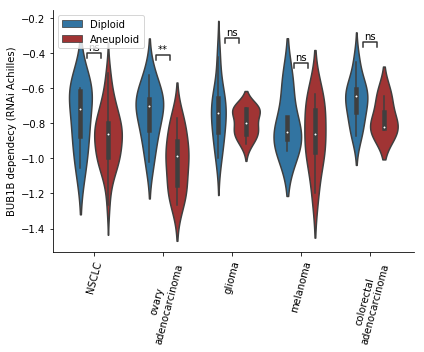

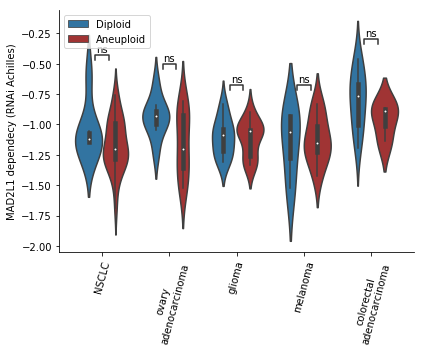

In [340]:

# bone = sample_info[sample_info.loc[:,'lineage_subtype'] == 'bone'].index
# breast = sample_info[sample_info.loc[:,'lineage_subtype'] == 'breast'].index
# colon = sample_info[sample_info.loc[:,'lineage_subtype'] == 'colorectal'].index
# lung = sample_info[sample_info.loc[:,'lineage_subtype'] == 'lung'].index
# ovary = sample_info[sample_info.loc[:,'lineage_subtype'] == 'ovary'].index

shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index) 
#without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


achilles_box = gene_effect_rnai_achilles.loc[shared]

achilles_box['lineage_subtype'] = sample_info.loc[achilles_box.index,'lineage_subtype']





achilles_box['ploidy'] = anot_CCLE.loc[achilles_box.index,'many_arm_events']

trus = achilles_box[achilles_box.loc[:,'ploidy']==True].index 
achilles_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = achilles_box[achilles_box.loc[:,'ploidy']==False].index 
achilles_box.loc[falsee,'ploidy']=  'Diploid'

#only lineage_subtypes we want

to_drop = []

for x in achilles_box.index:
    if  achilles_box.loc[x,'lineage_subtype'] != 'NSCLC' \
        and achilles_box.loc[x,'lineage_subtype'] != 'ovary_adenocarcinoma' and achilles_box.loc[x,'lineage_subtype'] != 'glioma' \
        and achilles_box.loc[x,'lineage_subtype'] != 'melanoma' and achilles_box.loc[x,'lineage_subtype'] != 'melanoma' \
        and achilles_box.loc[x,'lineage_subtype'] != 'colorectal_adenocarcinoma' :
            to_drop.append(x)
            
achilles_box_ = achilles_box.drop(to_drop)
achilles_box_ = achilles_box_.replace('ovary_adenocarcinoma','ovary\nadenocarcinoma')
achilles_box_ = achilles_box_.replace('colorectal_adenocarcinoma','colorectal\nadenocarcinoma')




lin_order = ['NSCLC','ovary\nadenocarcinoma','glioma','melanoma','colorectal\nadenocarcinoma']
##########################################################################################################
l_order = list(set(achilles_box_.loc[:,'lineage_subtype']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage_subtype", y="BUB1B (701)", hue="ploidy",
                     data=achilles_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(achilles_box_['lineage_subtype'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage_subtype', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineage_subtypes_violin_BUB1B_rnai_achilles_revision.png')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage_subtype", y="MAD2L1 (4085)", hue="ploidy",
                     data=achilles_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid"))
#     ]
width = 0.4
add_stat_annotation(ax, data=achilles_box_, x='lineage_subtype', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi Achilles)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineage_subtypes_violin_MAD2L1_rnai_achilles_revision.png')



#lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

In [338]:
pd.Series(Counter(drive_box.loc[:,'lineage_subtype'])).sort_values()

clear_cell_carcinoma             1
NaN                              1
caecum_adenocarcinoma            1
prostate_adenocarcinoma          1
fibrosarcoma                     1
chondrosarcoma                   1
breast_adenocarcinoma            1
MMMT                             1
osteosarcoma                     1
multiple_myeloma                 2
Ewing_sarcoma                    2
AML                              2
upper_aerodigestive_squamous     2
non_hodgkin_lymphoma             3
thyroid_carcinoma                3
SCLC                             3
rhabdomyosarcoma                 3
malignant_rhabdoid_tumor         4
bladder_carcinoma                4
hepatocellular_carcinoma         4
mesothelioma                     4
breast_ductal_carcinoma          5
renal_cell_carcinoma             5
neuroblastoma                    5
ALL                              5
breast_carcinoma                 5
gastric_adenocarcinoma           7
esophagus_squamous               9
endometrial_adenocar

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

colorectal
adenocarcinoma_Aneuploid v.s. colorectal
adenocarcinoma_Diploid: t-test independent samples, P_val=3.233e-02 stat=-2.285e+00
NSCLC_Aneuploid v.s. NSCLC_Diploid: t-test independent samples, P_val=5.682e-01 stat=-5.803e-01
ovary
adenocarcinoma_Aneuploid v.s. ovary
adenocarcinoma_Diploid: t-test independent samples, P_val=4.525e-01 stat=-7.897e-01
glioma_Aneuploid v.s. glioma_Diploid: t-test independent samples, P_val=9.071e-02 stat=-1.854e+00
melanoma_Aneuploid v.s. melanoma_Diploid: t-test independent samples, P_val=4.773e-02 stat=-2.205e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

colorectal
adenocarcinoma_Aneuploid v.s. colorectal
adenocarcinoma_Diploid: t-test independent samples, P_val=1.21

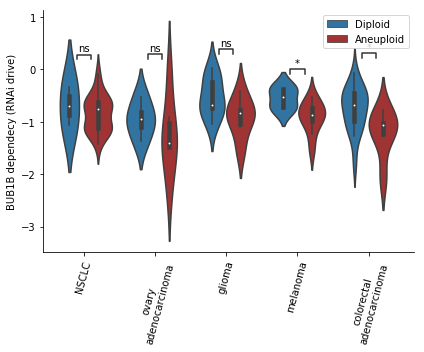

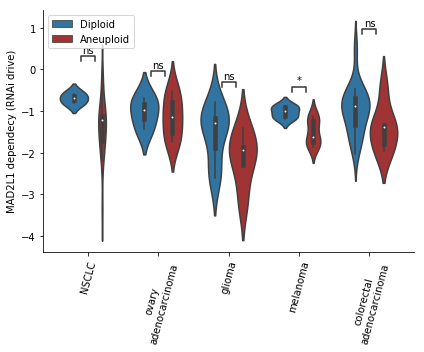

In [341]:

# bone = sample_info[sample_info.loc[:,'lineage_subtype'] == 'bone'].index
# breast = sample_info[sample_info.loc[:,'lineage_subtype'] == 'breast'].index
# colon = sample_info[sample_info.loc[:,'lineage_subtype'] == 'colorectal'].index
# lung = sample_info[sample_info.loc[:,'lineage_subtype'] == 'lung'].index
# ovary = sample_info[sample_info.loc[:,'lineage_subtype'] == 'ovary'].index

shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
#without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared


drive_box = gene_effect_rnai_drive.loc[shared]

drive_box['lineage_subtype'] = sample_info.loc[drive_box.index,'lineage_subtype']





drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineage_subtypes we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage_subtype'] != 'NSCLC' \
        and drive_box.loc[x,'lineage_subtype'] != 'ovary_adenocarcinoma' and drive_box.loc[x,'lineage_subtype'] != 'glioma' \
        and drive_box.loc[x,'lineage_subtype'] != 'melanoma' and drive_box.loc[x,'lineage_subtype'] != 'melanoma' \
        and drive_box.loc[x,'lineage_subtype'] != 'colorectal_adenocarcinoma' :
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('ovary_adenocarcinoma','ovary\nadenocarcinoma')
drive_box_ = drive_box_.replace('colorectal_adenocarcinoma','colorectal\nadenocarcinoma')




lin_order = ['NSCLC','ovary\nadenocarcinoma','glioma','melanoma','colorectal\nadenocarcinoma']
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage_subtype']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage_subtype", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage_subtype'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid")),
    
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage_subtype', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B dependecy (RNAi drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineage_subtypes_violin_BUB1B_rnai_drive_revision.png')


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage_subtype", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")


# box_pairs=[
#     (("skin", "Diploid"), ("skin", "Aneuploid")),
#     (("uterus", "Diploid"), ("uterus", "Aneuploid")),
#     (("gastric", "Diploid"), ("gastric", "Aneuploid")),
#     (("colorectal", "Diploid"), ("colorectal", "Aneuploid")),
#     (("ovary", "Diploid"), ("ovary", "Aneuploid")),
#     (("lung", "Diploid"), ("lung", "Aneuploid")),
#     (("bone", "Diploid"), ("bone", "Aneuploid"))
#     ]
width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage_subtype', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 dependecy (RNAi drive)')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2d/lineage_subtypes_violin_MAD2L1_rnai_drive_revision.png')



#lin_order = ['skin','lung','uterus','gastric','colorectal','ovary','bone']

In [326]:
new_pairs

[(('NSCLC', 'Diploid'), ('NSCLC', 'Aneuploid')),
 (('glioma', 'Diploid'), ('glioma', 'Aneuploid')),
 (('colorectal_adenocarcinoma', 'Diploid'),
  ('colorectal_adenocarcinoma', 'Aneuploid')),
 (('AML', 'Diploid'), ('AML', 'Aneuploid')),
 (('SCLC', 'Diploid'), ('SCLC', 'Aneuploid')),
 (('melanoma', 'Diploid'), ('melanoma', 'Aneuploid')),
 (('non_hodgkin_lymphoma', 'Diploid'), ('non_hodgkin_lymphoma', 'Aneuploid'))]

In [7]:
from taigapy import TaigaClient
tc = TaigaClient()
CCLE_mutations = tc.get(name='internal-20q1-f1a0', version=8, file='CCLE_mutations')

In [8]:
set(CCLE_mutations.loc[:,'Variant_annotation'])

{None, 'damaging', 'other conserving', 'other non-conserving', 'silent'}

In [9]:
CCLE_mutations

,Unnamed: 0,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
0,0,VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,...,None,None,34:221,34:213,None,None,None,None,damaging,ACH-000001
1,1,AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,...,None,None,9:0,53:193,None,None,None,28:32,other non-conserving,ACH-000001
2,2,IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,...,None,None,118:0,118:0,10:0,None,None,18:0,silent,ACH-000001
3,3,TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,...,None,None,None,None,6:28,None,None,None,damaging,ACH-000001
4,4,ZSCAN20,7579,37,1,33954141,33954141,+,Missense_Mutation,SNP,...,None,None,27:61,28:62,None,None,None,None,other non-conserving,ACH-000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300061,1302220,COL4A6,1288,37,X,107400439,107400439,+,None,None,...,None,59:0,None,None,None,None,None,None,None,ACH-003000
1300062,1302221,COL4A5,1287,37,X,107821607,107821607,+,None,None,...,None,95:0,None,None,None,None,None,None,None,ACH-003000
1300063,1302222,GPR112,139378,37,X,135426613,135426613,+,None,None,...,None,48:0,None,None,None,None,None,None,None,ACH-003000
1300064,1302223,SLITRK4,139065,37,X,142717252,142717252,+,None,None,...,None,105:0,None,None,None,None,None,None,None,ACH-003000


In [162]:
CCLE_mutations = tc.get(name='public-19q4-93d9', version=21, file='CCLE_mutations')

In [164]:
CCLE_mutations.columns

Index(['Unnamed: 0', 'Hugo_Symbol', 'Entrez_Gene_Id', 'NCBI_Build',
       'Chromosome', 'Start_position', 'End_position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'dbSNP_RS', 'dbSNP_Val_Status', 'Genome_Change',
       'Annotation_Transcript', 'Tumor_Sample_Barcode', 'cDNA_Change',
       'Codon_Change', 'Protein_Change', 'isDeleterious', 'isTCGAhotspot',
       'TCGAhsCnt', 'isCOSMIChotspot', 'COSMIChsCnt', 'ExAC_AF', 'CGA_WES_AC',
       'SangerWES_AC', 'SangerRecalibWES_AC', 'RNAseq_AC', 'HC_AC', 'RD_AC',
       'WGS_AC', 'Variant_annotation', 'DepMap_ID'],
      dtype='object')

In [246]:
damaging_mutation_20 = tc.get(name='depmap-mutation-calls-9a1a', version=18, file='damaging_mutation')
depmap_20Q2_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=18, file='depmap_20Q2_mutation_calls')
hotspot_mutation_20 = tc.get(name='depmap-mutation-calls-9a1a', version=18, file='hotspot_mutation')
other_mutation_20 = tc.get(name='depmap-mutation-calls-9a1a', version=18, file='other_mutation')


[##################]100% |   3.0 MiB/s | 241.2 MiB / 241.2 MiB | Time:  0:01:21
[##################]100% |   2.9 MiB/s | 277.3 MiB / 277.3 MiB | Time:  0:01:35
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (19,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
[##################]100% |   2.6 MiB/s |  96.8 MiB /  96.8 MiB | Time:  0:00:37
[##################]100% |   2.6 MiB/s | 258.9 MiB / 258.9 MiB | Time:  0:01:37


In [248]:
hotspot_mutation_20.columns = hotspot_mutation_20.columns.str.split(' ').str[0]
other_mutation_20.columns = other_mutation_20.columns.str.split(' ').str[0]

In [39]:
### fig 2e (TP53 mutation)

In [220]:
damaging_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation')
depmap_19Q4_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='depmap_19Q4_mutation_calls')
hotspot_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='hotspot_mutation')
other_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='other_mutation')


In [245]:
(other_mutation - hotspot_mutation).loc[:,'TP53'].dropna().sort_values()

ACH-002461   -1.0
ACH-000695   -1.0
ACH-000696   -1.0
ACH-002101   -1.0
ACH-000700   -1.0
             ... 
ACH-000618    0.0
ACH-000617    0.0
ACH-000615    0.0
ACH-000612    0.0
ACH-000836    0.0
Name: TP53, Length: 1640, dtype: float64

In [226]:
# redo plots for TP53

damaging_mutation.columns = damaging_mutation.columns.str.split(' ').str[0]
hotspot_mutation.columns = hotspot_mutation.columns.str.split(' ').str[0]
other_mutation.columns = other_mutation.columns.str.split(' ').str[0]

In [227]:
(other_mutation.loc[:,'TP53'] - hotspot_mutation.loc[:,'TP53']).dropna().sort_values()

ACH-002461   -1.0
ACH-000695   -1.0
ACH-000696   -1.0
ACH-002101   -1.0
ACH-000700   -1.0
             ... 
ACH-000618    0.0
ACH-000617    0.0
ACH-000615    0.0
ACH-000612    0.0
ACH-000836    0.0
Name: TP53, Length: 1640, dtype: float64

In [208]:
hotspot_mutation.loc[:,'TP53'][hotspot_mutation.loc[:,'TP53']==1]

ACH-000001    1.0
ACH-000003    1.0
ACH-000004    1.0
ACH-000005    1.0
ACH-000006    1.0
             ... 
ACH-002389    1.0
ACH-002392    1.0
ACH-002395    1.0
ACH-002396    1.0
ACH-002461    1.0
Name: TP53, Length: 1049, dtype: float64

In [228]:
dam_tp53 = pd.Series('damaging',index=damaging_mutation.loc[:,'TP53'][damaging_mutation.loc[:,'TP53']==1].index)

hot_tp53 = pd.Series('hotspot',index=hotspot_mutation.loc[:,'TP53'][hotspot_mutation.loc[:,'TP53']==1].index)

other_tp53 = pd.Series('other',index=other_mutation.loc[:,'TP53'][other_mutation.loc[:,'TP53']==1].index)

In [229]:
set(other_tp53.index) - set(hot_tp53.index)

set()

In [230]:
hot_tp53.index

Index(['ACH-000001', 'ACH-000003', 'ACH-000004', 'ACH-000005', 'ACH-000006',
       'ACH-000009', 'ACH-000012', 'ACH-000013', 'ACH-000014', 'ACH-000015',
       ...
       'ACH-002316', 'ACH-002340', 'ACH-002341', 'ACH-002345', 'ACH-002349',
       'ACH-002389', 'ACH-002392', 'ACH-002395', 'ACH-002396', 'ACH-002461'],
      dtype='object', length=1049)

In [231]:
other_tp53 = other_tp53.loc[set(other_tp53.index) - set(dam_tp53.index) - set(hot_tp53.index)]
hot_tp53 = hot_tp53.loc[set(hot_tp53.index) - set(dam_tp53.index)]

In [232]:
set(other_tp53.index) - set(dam_tp53.index) - set(hot_tp53.index)

set()

In [233]:
tp53_mutations = pd.concat([pd.concat([dam_tp53,hot_tp53]),other_tp53])

In [234]:
wt_tp53 = pd.Series('WT',index = set(all_lines) - set(tp53_mutations.index))

In [235]:
all_tp53 = pd.concat([tp53_mutations,wt_tp53])

In [236]:
# set(temp.loc[:,'status'])

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/statannot-0.2.2-py3.6.egg/statannot/statannot.py:193: FutureWarning: elementwise comparison failed; returning sc

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=6.276e-03 stat=-2.849e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=1.330e-02 stat=-2.573e+00
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=1.574e-02 stat=-2.472e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=2.658e-03 stat=-3.156e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=5.705e-01 stat=-5.714e-01
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=3.192e-03 stat=-3.048e+00


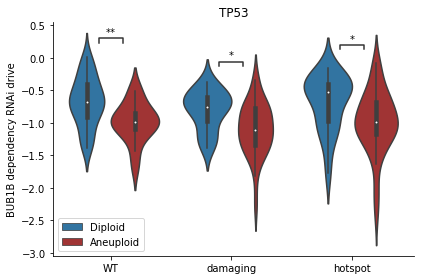

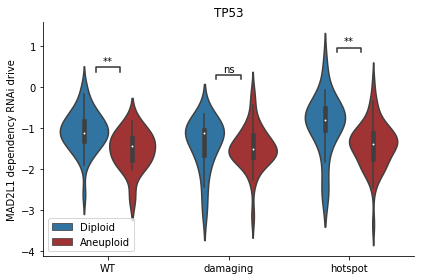

In [237]:
all_tp53 = pd.concat([tp53_mutations,wt_tp53])
all_tp53 = pd.DataFrame(all_tp53,columns=['status'])
all_tp53['BUB1B'] = gene_effect_rnai_drive_.loc[all_tp53.index,'BUB1B (701)']
all_tp53['MAD2L1'] = gene_effect_rnai_drive_.loc[all_tp53.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(all_tp53.dropna().index)
temp = all_tp53.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp=temp.dropna()

ax = sns.violinplot(x="status", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi drive')

box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("damaging", "Diploid"), ("damaging", "Aneuploid")),
    (("hotspot", "Diploid"), ("hotspot", "Aneuploid")),
    #(("other", "Diploid"), ("other", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])#,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('bub1b_rnai_drive_tp53_updated.png')


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="status", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi drive')


width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc = 'lower left')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('mad2l1_rnai_drive_tp53_updated.png')


plotting.simpleaxis()



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/statannot-0.2.2-py3.6.egg/statannot/statannot.py:193: FutureWarning: elementwise comparison failed; returning sc

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=1.102e-03 stat=-3.400e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=5.079e-03 stat=-2.911e+00
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=4.444e-03 stat=-2.922e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=7.403e-04 stat=-3.525e+00
damaging_Aneuploid v.s. damaging_Diploid: t-test independent samples, P_val=1.266e-01 stat=-1.549e+00
hotspot_Aneuploid v.s. hotspot_Diploid: t-test independent samples, P_val=1.401e-03 stat=-3.302e+00


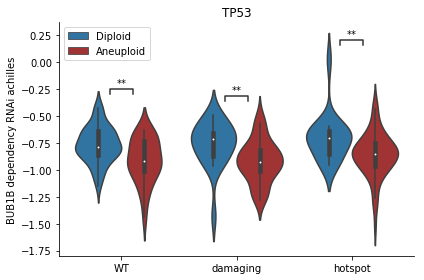

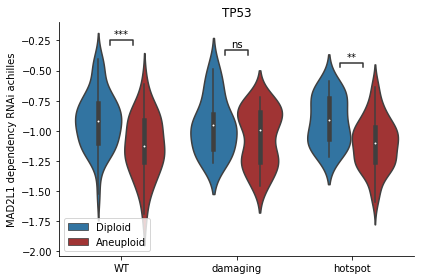

In [219]:
all_tp53 = pd.concat([tp53_mutations,wt_tp53])
all_tp53 = pd.DataFrame(all_tp53,columns=['status'])
all_tp53['BUB1B'] = gene_effect_rnai_achilles_.loc[all_tp53.index,'BUB1B (701)']
all_tp53['MAD2L1'] = gene_effect_rnai_achilles_.loc[all_tp53.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(all_tp53.dropna().index)
temp = all_tp53.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp=temp.dropna()

ax = sns.violinplot(x="status", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi achilles')

box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("damaging", "Diploid"), ("damaging", "Aneuploid")),
    (("hotspot", "Diploid"), ("hotspot", "Aneuploid")),
    #(("other", "Diploid"), ("other", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])#,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('bub1b_rnai_achilles_tp53_updated.pdf')


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="status", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['WT', 'damaging', 'hotspot', 'other'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi achilles')


width = 0.4
add_stat_annotation(ax, data=temp,x="status", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['WT', 'damaging', 'hotspot', 'other'])

plt.title('TP53')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc = 'lower left')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('mad2l1_rnai_achilles_tp53_updated.pdf')


plotting.simpleaxis()




In [61]:
len(set(depmap_19Q4_mutation_calls.loc[:,'Variant_Classification'].replace('None',float('nan')).dropna().index))

1666

In [70]:
set(depmap_19Q4_mutation_calls.loc[:,'Variant_annotation'].dropna())

{'damaging', 'other conserving', 'other non-conserving', 'silent'}

In [10]:
depmap_19Q4_mutation_calls.index = depmap_19Q4_mutation_calls.loc[:,'DepMap_ID']

In [46]:
tp53 = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'ARID1A']

In [11]:
ARID1A = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'ARID1A']
CTCF = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'CTCF']
PTEN = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'PTEN']
RNF43 = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'RNF43']

In [25]:
all_lines = set(damaging_mutation.index) | set(hotspot_mutation.index) | set(other_mutation.index)
all_columns = set(damaging_mutation.columns) | set(hotspot_mutation.columns) | set(other_mutation.columns)

In [73]:
summed = damaging_mutation.loc[all_lines,all_columns].replace(float('nan'),0) + hotspot_mutation.loc[all_lines,all_columns].replace(float('nan'),0) + other_mutation.loc[all_lines,all_columns].replace(float('nan'),0)
summed = summed.replace(float('nan'),0)
summed.columns = summed.columns.str.split(' ').str[0]

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [74]:
len(set(depmap_19Q4_mutation_calls.index))

1666

In [87]:
ARID1A_wt_ = pd.Series('ARID1A',index=summed[summed.loc[:,'ARID1A'] == 0].index,)


CTCF_wt_ = pd.Series('CTCF',index=summed[summed.loc[:,'CTCF'] == 0].index)
PTEN_wt_ = pd.Series('PTEN',index=summed[summed.loc[:,'PTEN'] == 0].index)
RNF43_wt_ = pd.Series('RNF43',index=summed[summed.loc[:,'RNF43'] == 0].index)


In [88]:
alls_ = pd.concat([ARID1A_wt_,CTCF_wt_])
alls_ = pd.concat([alls_,PTEN_wt_])
alls_ = pd.concat([alls_,RNF43_wt_])

In [91]:
alls_

ACH-000487    ARID1A
ACH-000477    ARID1A
ACH-000064    ARID1A
ACH-000584    ARID1A
ACH-000125    ARID1A
               ...  
ACH-000557     RNF43
ACH-000090     RNF43
ACH-002232     RNF43
ACH-000895     RNF43
ACH-000656     RNF43
Length: 6093, dtype: object

In [92]:
lines =  set(depmap_19Q4_mutation_calls.index)

In [93]:
ARID1A_wt = ARID1A.loc[lines,'Variant_annotation'][ARID1A.loc[lines,'Variant_annotation']!=ARID1A.loc[lines,'Variant_annotation']]
CTCF_wt = CTCF.loc[lines,'Variant_annotation'][CTCF.loc[lines,'Variant_annotation']!=CTCF.loc[lines,'Variant_annotation']]
PTEN_wt = PTEN.loc[lines,'Variant_annotation'][PTEN.loc[lines,'Variant_annotation']!=PTEN.loc[lines,'Variant_annotation']]
RNF43_wt = RNF43.loc[lines,'Variant_annotation'][RNF43.loc[lines,'Variant_annotation']!=RNF43.loc[lines,'Variant_annotation']]


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [94]:
ARID1A_wt[:] = 'ARID1A'

CTCF_wt[:] = 'CTCF'

PTEN_wt[:] = 'PTEN'

RNF43_wt[:] = 'RNF43'



In [95]:
alls = pd.concat([ARID1A_wt,CTCF_wt])
alls = pd.concat([alls,PTEN_wt])
alls = pd.concat([alls,RNF43_wt])

In [101]:
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.copy()
gene_effect_rnai_drive_ = gene_effect_rnai_drive.copy()

gene_effect_rnai_achilles_.index = sample_info.loc[gene_effect_rnai_achilles.index,'DepMap_ID']
gene_effect_rnai_drive_.index = sample_info.loc[gene_effect_rnai_drive.index,'DepMap_ID']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [102]:
alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_drive_.loc[alls_.index,'BUB1B (701)']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [106]:
alls_.columns = ['gene','BUB1B','MAD2L1']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Diploid v.s. PTEN_Aneuploid: t-test independent samples, P_val=1.494e-04 stat=3.892e+00
CTCF_Diploid v.s. CTCF_Aneuploid: t-test independent samples, P_val=4.716e-05 stat=4.185e+00
ARID1A_Diploid v.s. ARID1A_Aneuploid: t-test independent samples, P_val=8.042e-04 stat=3.427e+00
RNF43_Diploid v.s. RNF43_Aneuploid: t-test independent samples, P_val=2.383e-05 stat=4.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Diploid v.s. PTEN_Aneuploid: t-test independent samples, P_val=1.149e-03 stat=3.315e+00
CTCF_Diploid v.s. CTCF_Aneuploid: t-test independent samples, P_val=1.269e-03 stat=3.282e+00
ARID1A_Diploid v.s. ARID1A_Aneuploid: t-test independent samples, P_val=1.923e-04 stat=3.831e+00
RNF43_Diplo

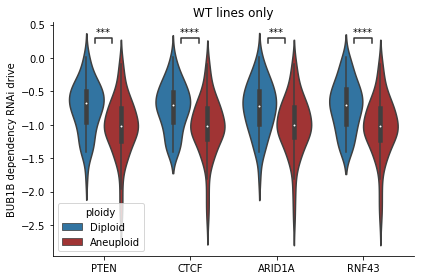

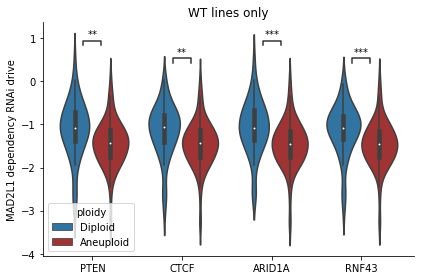

In [171]:
alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_drive_.loc[alls_.index,'BUB1B (701)']
alls_['MAD2L1'] = gene_effect_rnai_drive_.loc[alls_.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(alls_.dropna().index)
temp = alls_.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


ax = sns.violinplot(x="gene", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi drive')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('review_plots/bub1b_rnai_drive_WT_revision_NEW.png')


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="gene", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi drive')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('review_plots/mad2l1_rnai_drive_WT_revision_NEW.png')
plotting.simpleaxis()


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Diploid v.s. PTEN_Aneuploid: t-test independent samples, P_val=2.181e-06 stat=4.892e+00
CTCF_Diploid v.s. CTCF_Aneuploid: t-test independent samples, P_val=1.130e-05 stat=4.503e+00
ARID1A_Diploid v.s. ARID1A_Aneuploid: t-test independent samples, P_val=4.387e-05 stat=4.189e+00
RNF43_Diploid v.s. RNF43_Aneuploid: t-test independent samples, P_val=5.361e-06 stat=4.676e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Diploid v.s. PTEN_Aneuploid: t-test independent samples, P_val=1.325e-05 stat=4.478e+00
CTCF_Diploid v.s. CTCF_Aneuploid: t-test independent samples, P_val=1.516e-06 stat=4.957e+00
ARID1A_Diploid v.s. ARID1A_Aneuploid: t-test independent samples, P_val=1.748e-05 stat=4.414e+00
RNF43_Diplo

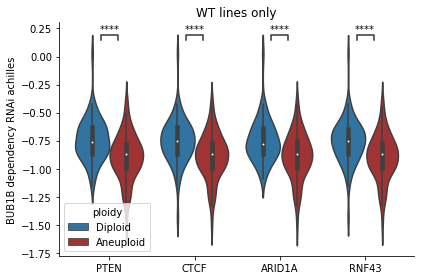

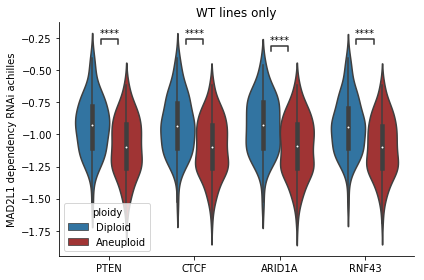

In [170]:
alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_achilles_.loc[alls_.index,'BUB1B (701)']
alls_['MAD2L1'] = gene_effect_rnai_achilles_.loc[alls_.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(alls_.dropna().index)
temp = alls_.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


ax = sns.violinplot(x="gene", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi achilles')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('review_plots/bub1b_rnai_achilles_WT_revision_NEW.png')



plt.figure()


ax = sns.violinplot(x="gene", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi achilles')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plt.savefig('review_plots/mad2l1_rnai_achilles_WT_revision_NEW.png')
plotting.simpleaxis()



In [174]:
depmap_19Q4_mutation_calls.loc[:,['Hugo_Symbol','Variant_annotation','DepMap_ID']].sort_values('Variant_annotation')

,Hugo_Symbol,Variant_annotation,DepMap_ID
DepMap_ID,,,
ACH-000001,VPS13D,damaging,ACH-000001
ACH-000938,UBXN2A,damaging,ACH-000938
ACH-000938,GPR113,damaging,ACH-000938
ACH-000938,HEATR5B,damaging,ACH-000938
ACH-000938,CEBPZ,damaging,ACH-000938
...,...,...,...
ACH-002062,ESYT2,None,ACH-002062
ACH-002062,RP11-122A3.2,None,ACH-002062
ACH-002062,KLF4,None,ACH-002062


In [180]:
temp = depmap_19Q4_mutation_calls.loc['ACH-002062'][depmap_19Q4_mutation_calls.loc['ACH-002062','Variant_annotation']!=depmap_19Q4_mutation_calls.loc['ACH-002062','Variant_annotation']]
temp.loc[:,['Hugo_Symbol','Variant_Classification','Variant_Type','Variant_annotation']]


,Hugo_Symbol,Variant_Classification,Variant_Type,Variant_annotation
DepMap_ID,,,,
ACH-002062,MEGF6,None,None,None
ACH-002062,A3GALT2,None,None,None
ACH-002062,KIAA0319L,None,None,None
ACH-002062,TCTEX1D4,None,None,None
ACH-002062,AL358813.2,None,None,None
...,...,...,...,...
ACH-002062,ESYT2,None,None,None
ACH-002062,RP11-122A3.2,None,None,None
ACH-002062,KLF4,None,None,None


In [184]:
dam_tp53.index & other_tp53.index

Index(['ACH-000068', 'ACH-000122', 'ACH-000171', 'ACH-000195', 'ACH-000277',
       'ACH-000314', 'ACH-000334', 'ACH-000339', 'ACH-000370', 'ACH-000398',
       'ACH-000429', 'ACH-000438', 'ACH-000473', 'ACH-000512', 'ACH-000519',
       'ACH-000561', 'ACH-000581', 'ACH-000611', 'ACH-000623', 'ACH-000649',
       'ACH-000667', 'ACH-000690', 'ACH-000698', 'ACH-000707', 'ACH-000726',
       'ACH-000741', 'ACH-000751', 'ACH-000770', 'ACH-000777', 'ACH-000782',
       'ACH-000784', 'ACH-000792', 'ACH-000795', 'ACH-000810', 'ACH-000835',
       'ACH-000846', 'ACH-000865', 'ACH-000866', 'ACH-000867', 'ACH-000879',
       'ACH-000888', 'ACH-000895', 'ACH-000896', 'ACH-000936', 'ACH-000940',
       'ACH-000949', 'ACH-000965', 'ACH-000969', 'ACH-000978', 'ACH-000981',
       'ACH-000987', 'ACH-000991', 'ACH-000992', 'ACH-000996', 'ACH-000997',
       'ACH-000999', 'ACH-001035', 'ACH-001183', 'ACH-001318', 'ACH-001332',
       'ACH-001368', 'ACH-001395', 'ACH-001407', 'ACH-001416', 'ACH-001490',

In [402]:
list(set(temp.loc[:,'Variant_annotation']))

['PTEN', 'CTCF', 'ARID1A', 'RNF43']

In [415]:
from_above = temp[temp.loc[:,'Variant_annotation'] == 'ARID1A'].index

In [294]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)

In [295]:
muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [296]:
muts.index = anot.loc[muts.index,'CCLE_ID']

In [297]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(muts.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

In [298]:
temp.index = sample_info.loc[temp.index,'DepMap_ID']

In [299]:
muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [300]:
damaging = damaging_mutation[damaging_mutation.loc[:,'RNF43 (54894)']==1.0].index

In [301]:
damaging_include = temp.index & damaging

In [302]:
wt_include = muts[muts == 'WT'].index & temp.index

In [303]:
muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

In [304]:
temp['mutation status'] = ''

In [305]:
temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

In [316]:
from collections import Counter
Counter(temp.loc[:,'mutation status'])




Counter({'WT': 198, 'ONC': 8, 'DAM': 14, 'SIL': 1})

In [422]:
where = set(temp[temp.loc[:,'mutation status'] == 'WT'].index) - set(from_above)

ARID1A_wt.loc[where]

KeyError: "None of [Index(['ACH-000023', 'ACH-000607', 'ACH-000534', 'ACH-000471', 'ACH-000255',\n       'ACH-000631', 'ACH-000522', 'ACH-000555', 'ACH-000817', 'ACH-000622',\n       'ACH-000645', 'ACH-000574', 'ACH-000366', 'ACH-000599', 'ACH-000409',\n       'ACH-000721', 'ACH-000213', 'ACH-001306', 'ACH-000312', 'ACH-000371',\n       'ACH-000086', 'ACH-000895', 'ACH-001189', 'ACH-000348', 'ACH-000341',\n       'ACH-000117', 'ACH-000756', 'ACH-000740', 'ACH-000810', 'ACH-000191',\n       'ACH-000807', 'ACH-000502', 'ACH-000447', 'ACH-000517', 'ACH-000532',\n       'ACH-000256', 'ACH-000799', 'ACH-000728', 'ACH-000955', 'ACH-000480',\n       'ACH-000164', 'ACH-000733', 'ACH-000098', 'ACH-000648', 'ACH-000384',\n       'ACH-000397', 'ACH-000963', 'ACH-000433', 'ACH-000403', 'ACH-000418',\n       'ACH-000018', 'ACH-000207', 'ACH-001089', 'ACH-000593', 'ACH-001307',\n       'ACH-000857', 'ACH-000227', 'ACH-000008', 'ACH-000243', 'ACH-000149',\n       'ACH-000316'],\n      dtype='object', name='DepMap_ID')] are in the [index]"

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/mkazachk/mi

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Diploid v.s. WT_Aneuploid: t-test independent samples, P_val=6.378e-03 stat=2.770e+00
SIL_Diploid v.s. SIL_Aneuploid: t-test independent samples, P_val=nan stat=nan
ONC_Diploid v.s. ONC_Aneuploid: t-test independent samples, P_val=1.132e-01 stat=1.918e+00
DAM_Diploid v.s. DAM_Aneuploid: t-test independent samples, P_val=3.399e-04 stat=4.042e+00


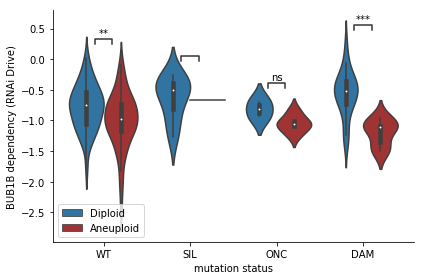

In [416]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)



muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


muts.index = anot.loc[muts.index,'CCLE_ID']

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(muts.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp.index = sample_info.loc[temp.index,'DepMap_ID']

muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


damaging = damaging_mutation[damaging_mutation.loc[:,'ARID1A (8289)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

######################################################################################################

ax = sns.violinplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])




#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('BUB1B dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],)
plt.tight_layout()
# plt.savefig('fig2e/CTCF_BUB1B_rnai_drive_revision.png')


# plt.figure()


# ax = sns.violinplot(x="mutation status", y="MAD2L1 (4085)", hue="ploidy",
#                      data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
#                    hue_order=['Diploid','Aneuploid'])#palette="muted")




# box_pairs=[
#     (("WT", "Diploid"), ("WT", "Aneuploid")),
#     (("SIL", "Diploid"), ("SIL", "Aneuploid")),
#     (("ONC", "Diploid"), ("ONC", "Aneuploid")),
#     (("DAM", "Diploid"), ("DAM", "Aneuploid"))
#     ]
# width = 0.4
# add_stat_annotation(ax, data=temp,x="mutation status", y='MAD2L1 (4085)', hue='ploidy', width=width,
#                     box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])


# #ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
# #                     data=temp, )#palette="muted")

# plotting.simpleaxis(ax)
# plt.ylabel('MAD2L1 dependency (RNAi Drive)')
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[0:], labels=labels[0:],loc = 'lower left')
# plt.tight_layout()
# plt.savefig('fig2e/CTCF_MAD2L1_rnai_drive_revision.png')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=7.793e-06 stat=-4.593e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=7.082e-02 stat=-2.193e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples, P_val=8.709e-01 stat=-1.660e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

WT_Aneuploid v.s. WT_Diploid: t-test independent samples, P_val=1.978e-06 stat=-4.903e+00
SIL_Aneuploid v.s. SIL_Diploid: t-test independent samples, P_val=nan stat=nan
ONC_Aneuploid v.s. ONC_Diploid: t-test independent samples, P_val=1.783e-02 stat=-3.234e+00
DAM_Aneuploid v.s. DAM_Diploid: t-test independent samples

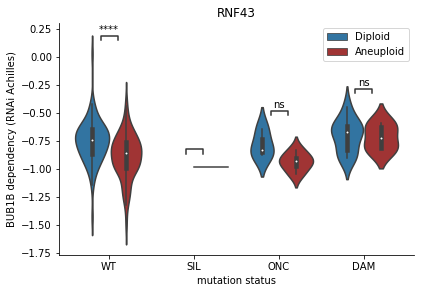

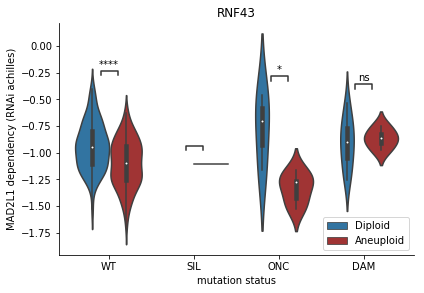

In [309]:
shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index) 
shared_depmap = sample_info.loc[shared,'DepMap_ID']
shared_depmap = set(shared_depmap) & set(depmap_19Q4_mutation_calls.index)



muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


muts.index = anot.loc[muts.index,'CCLE_ID']

shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index) & set(muts.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp.index = sample_info.loc[temp.index,'DepMap_ID']

muts = (tp53.loc[shared_depmap,'Variant_annotation'].replace(float('NaN'),'WT').replace('damaging','DAM').replace('other non-conserving','ONC').replace('silent','SIL'))


damaging = damaging_mutation[damaging_mutation.loc[:,'RNF43 (54894)']==1.0].index

damaging_include = temp.index & damaging

wt_include = muts[muts == 'WT'].index & temp.index

muts_ = muts.drop(muts[muts == 'DAM'].index)
onc_include = muts_[muts_ == 'ONC'].index & temp.index
sil_include = muts_[muts_ == 'SIL'].index & temp.index

temp['mutation status'] = ''

temp.loc[damaging_include,'mutation status'] = 'DAM'
temp.loc[wt_include,'mutation status'] =  'WT'
temp.loc[onc_include,'mutation status'] = 'ONC'
temp.loc[sil_include,'mutation status'] = 'SIL'

######################################################################################################

ax = sns.violinplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")


box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])




#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('BUB1B dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.title('RNF43')
plt.savefig('fig2e/RNF43_BUB1B_rnai_achilles_revision.png')


plt.figure()


ax = sns.violinplot(x="mutation status", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp, order = ['WT','SIL','ONC','DAM'],palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")




box_pairs=[
    (("WT", "Diploid"), ("WT", "Aneuploid")),
    (("SIL", "Diploid"), ("SIL", "Aneuploid")),
    (("ONC", "Diploid"), ("ONC", "Aneuploid")),
    (("DAM", "Diploid"), ("DAM", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="mutation status", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order = ['WT','SIL','ONC','DAM'])


#ax = sns.swarmplot(x="mutation status", y="BUB1B (701)", hue="ploidy",
#                     data=temp, )#palette="muted")

plotting.simpleaxis(ax)
plt.ylabel('MAD2L1 dependency (RNAi achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower right')
plt.tight_layout()
plt.title('RNF43')
plt.savefig('fig2e/RNF43_MAD2L1_rnai_achilles_revision.png')

In [65]:
# shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
# temp = gene_effect_rnai_drive.loc[shared]
# temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

# trus = temp[temp.loc[:,'ploidy']==True].index 
# temp.loc[trus,'ploidy']= 'Aneuploid'
# falsee = temp[temp.loc[:,'ploidy']==False].index 
# temp.loc[falsee,'ploidy']=  'Diploid'

In [66]:
#temp['dub'] = 0

In [67]:
#temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

In [68]:
#temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]

In [71]:
# temp['doubling time'] = ''

In [72]:
# below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

In [73]:
# _50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

In [74]:
# _75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


In [75]:
# above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

In [76]:
# temp.loc[below_50,'doubling time'] = '< 35'
# temp.loc[_50_to_75,'doubling time'] = '35-49'
# temp.loc[_75_to_100,'doubling time'] = '50-64'
# temp.loc[above_100,'doubling time'] = '> 64'

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Diploid v.s. < 35_Aneuploid: t-test independent samples, P_val=2.655e-03 stat=3.259e+00
35-49_Diploid v.s. 35-49_Aneuploid: t-test independent samples, P_val=8.858e-02 stat=1.760e+00
50-64_Diploid v.s. 50-64_Aneuploid: t-test independent samples, P_val=4.560e-02 stat=2.194e+00
> 64_Diploid v.s. > 64_Aneuploid: t-test independent samples, P_val=2.275e-01 stat=1.249e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Diploid v.s. < 35_Aneuploid: t-test independent samples, P_val=1.027e-01 stat=1.687e+00
35-49_Diploid v.s. 35-49_Aneuploid: t-test independent samples, P_val=3.655e-03 stat=3.162e+00
50-64_Diploid v.s. 50-64_Aneuploid: t-test independent samples, P_val=7.276e-02 stat=1.940e+00
> 64_Diploid 

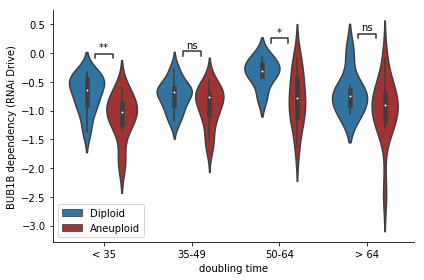

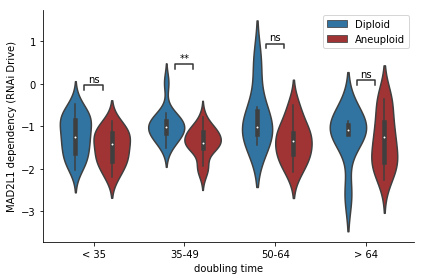

In [126]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp['dub'] = 0

temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]


temp['doubling time'] = ''

below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

_50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

_75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

temp.loc[below_50,'doubling time'] = '< 35'
temp.loc[_50_to_75,'doubling time'] = '35-49'
temp.loc[_75_to_100,'doubling time'] = '50-64'
temp.loc[above_100,'doubling time'] = '> 64'




#############################################################################


ax = sns.violinplot(x="doubling time", y="BUB1B (701)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order = ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('BUB1B dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('fig2g/doubling_time_BUB1B_rnai_drive.pdf')


plt.figure()


ax = sns.violinplot(x="doubling time", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order =  ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('MAD2L1 dependency (RNAi Drive)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2g/doubling_time_MAD2L1_rnai_drive.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=2.637e-03 stat=-3.143e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=6.717e-02 stat=-1.862e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=7.182e-02 stat=-1.862e+00
> 64_Aneuploid v.s. > 64_Diploid: t-test independent samples, P_val=8.853e-03 stat=-2.709e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

< 35_Aneuploid v.s. < 35_Diploid: t-test independent samples, P_val=6.221e-04 stat=-3.619e+00
35-49_Aneuploid v.s. 35-49_Diploid: t-test independent samples, P_val=3.018e-02 stat=-2.216e+00
50-64_Aneuploid v.s. 50-64_Diploid: t-test independent samples, P_val=4.231e-02 stat=-2.115e+00
> 64_A

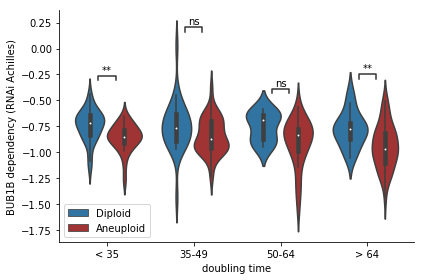

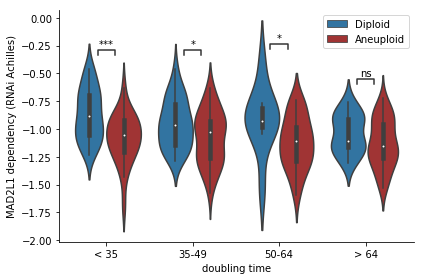

In [127]:
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

temp['dub'] = 0

temp['dub'] = anot_CCLE.loc[temp.index,'RNAi_doubling_time']

temp_doubling = temp[temp.loc[:,'dub']== temp.loc[:,'dub']]


temp['doubling time'] = ''

below_50 = temp_doubling[temp_doubling.loc[:,'dub'] < 35].index

_50_to_75 = temp_doubling.drop(below_50)[temp_doubling.drop(below_50).loc[:,'dub'] < 50].index

_75_to_100 = temp_doubling.drop(list(below_50)+list(_50_to_75))[temp_doubling.drop(list(below_50)+list(_50_to_75)).loc[:,'dub'] < 65].index


above_100 = temp_doubling[temp_doubling.loc[:,'dub'] >65].index

temp.loc[below_50,'doubling time'] = '< 35'
temp.loc[_50_to_75,'doubling time'] = '35-49'
temp.loc[_75_to_100,'doubling time'] = '50-64'
temp.loc[above_100,'doubling time'] = '> 64'




#############################################################################


ax = sns.violinplot(x="doubling time", y="BUB1B (701)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order = ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('BUB1B dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()
plt.savefig('fig2g/doubling_time_BUB1B_rnai_achilles.pdf')


plt.figure()


ax = sns.violinplot(x="doubling time", y="MAD2L1 (4085)", hue="ploidy",
                     data=temp[temp.loc[:,'doubling time']!=''],order =  ['< 35', '35-49','50-64','> 64'] ,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'])#palette="muted")
plotting.simpleaxis(ax)

box_pairs=[
    (("< 35", "Diploid"), ("< 35", "Aneuploid")),
    (("35-49", "Diploid"), ("35-49", "Aneuploid")),
    (("50-64", "Diploid"), ("50-64", "Aneuploid")),
    (("> 64", "Diploid"), ("> 64", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="doubling time", y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order =  ['< 35', '35-49','50-64','> 64'])





plt.ylabel('MAD2L1 dependency (RNAi Achilles)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig('fig2g/doubling_time_MAD2L1_rnai_achilles.pdf')

In [699]:
# for fig 2f need WGD information (ask James where to get that info)

In [103]:
CCLE_ABSOLUTE_combined_table = tc.get(name='ccle-absolute-cn', version=5, file='CCLE_ABSOLUTE_combined_table')

[##################]100% |  28.0 MiB/s |  89.0 KiB /  89.0 KiB | ETA:  00:00:00


In [105]:
CCLE_ABSOLUTE_combined_table.index = CCLE_ABSOLUTE_combined_table.loc[:,'CCLE_ID']

In [108]:
zero_dups = CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index

In [190]:
sh = set(anot_CCLE.index & zero_dups)
l = len(anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna())

lows = anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna().sort_values().iloc[0:int(l*.25)].index
highs = anot_CCLE.loc[sh].loc[:,'num_arm_events'].dropna().sort_values().iloc[int(l*.75):].index

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.48279694173600174
RNAi Achilles p-value for MAD2L1: 0.011038462106804607


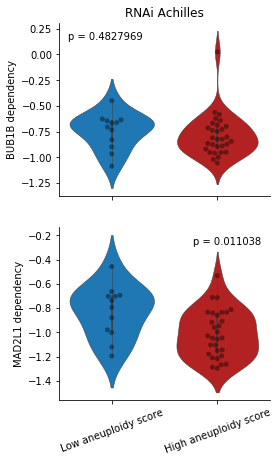

In [222]:
# want to also regress out Het70 scores
#rnai achilles

#for_zero_dups = anot_CCLE.index & gene_effect_rnai_achilles.index & zero_dups


# mu = gene_effect_rnai_achilles.loc[for_zero_dups].mean()
# reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1, 1), gene_effect_rnai_achilles.loc[for_zero_dups] - mu)
# preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1,1)),index = for_zero_dups,columns = gene_effect_rnai_achilles.columns)

# preds_ = preds 
# gene_effect_rnai_achilles = (gene_effect_rnai_achilles.loc[for_zero_dups] - preds_)+ mu



my_pal2 = {"Low aneuploidy score": "C0", "High aneuploidy score": "firebrick"}
my_order2 = order=['Low aneuploidy score','High aneuploidy score']



fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index) & set(sh)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

#trus = temp[temp.loc[:,'ploidy']==True].index 
trus = set( highs & temp.index)
temp.loc[trus,'ploidy']= 'High aneuploidy score'
#falsee = temp[temp.loc[:,'ploidy']==False].index
falsee = set(lows & temp.index)
temp.loc[falsee,'ploidy']=  'Low aneuploidy score'




my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()

#axx[0].tick_params(labelrotation=45)
axx[0].set_xticklabels([])
axx[1].tick_params(labelrotation=20,axis='x')

from scipy import stats
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'BUB1B (701)'],gene_effect_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False,loc='upper left')
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
plt.savefig('fig2f/rnai_achilles_WGD.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi drive p-value for BUB1B: 0.18114571571131932
RNAi drive p-value for MAD2L1: 0.6222270123181249


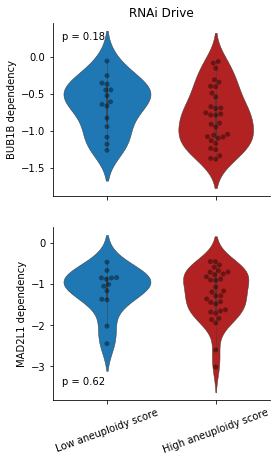

In [223]:
# want to also regress out Het70 scores
#rnai drive

#for_zero_dups = anot_CCLE.index & gene_effect_rnai_drive.index & zero_dups


# mu = gene_effect_rnai_drive.loc[for_zero_dups].mean()
# reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1, 1), gene_effect_rnai_drive.loc[for_zero_dups] - mu)
# preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_zero_dups]).reshape(-1,1)),index = for_zero_dups,columns = gene_effect_rnai_drive.columns)

# preds_ = preds 
# gene_effect_rnai_drive = (gene_effect_rnai_drive.loc[for_zero_dups] - preds_)+ mu



my_pal2 = {"Low aneuploidy score": "C0", "High aneuploidy score": "firebrick"}
my_order2 = order=['Low aneuploidy score','High aneuploidy score']



fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index) & set(sh)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

#trus = temp[temp.loc[:,'ploidy']==True].index 
trus = set( highs & temp.index)
temp.loc[trus,'ploidy']= 'High aneuploidy score'
#falsee = temp[temp.loc[:,'ploidy']==False].index
falsee = set(lows & temp.index)
temp.loc[falsee,'ploidy']=  'Low aneuploidy score'




my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Low aneuploidy score','High aneuploidy score'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'],palette=my_pal2)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Low aneuploidy score','High aneuploidy score'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()

#axx[0].tick_params(labelrotation=45)
axx[0].set_xticklabels([])
axx[1].tick_params(labelrotation=20,axis='x')

from scipy import stats
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,2)),frameon=False,loc='upper left')
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,2)),frameon=False,loc='lower left')
plt.savefig('fig2f/rnai_drive_WGD.pdf')

In [134]:
full_anot = tc.get(name='aneuploidy-data-d0b9', version=7, file='aneuploidy_data')

Taiga needs to convert data before we can fetch it.  Waiting...



[##################]100% |  13.9 MiB/s |  46.0 KiB /  46.0 KiB | ETA:  00:00:00


In [136]:
full_anot.index = full_anot.loc[:,'DepMap_ID']

full_anot_CCLE = full_anot.copy()
full_anot_CCLE.index = full_anot.loc[:,'CCLE_ID']

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.3254884345964969        p = 2.833559456544128e-05
MAD2L1 dependency and expression : r = -0.23250992460700332        p = 0.0031856259699617724


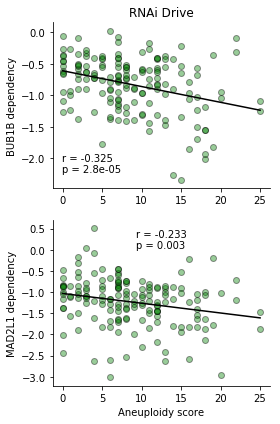

In [163]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_drive.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_drive.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,3)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Drive')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_drive.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.2740796201402423        p = 0.0001887859602282653
MAD2L1 dependency and expression : r = -0.39729577543772354        p = 3.0651217342017035e-08


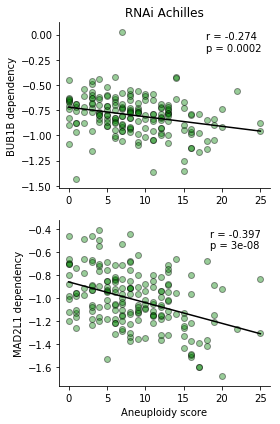

In [168]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

sh = set(full_anot_CCLE.index & gene_effect_rnai_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table[CCLE_ABSOLUTE_combined_table.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)



axx[1].plot(np.unique(full_anot_CCLE.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot_CCLE.loc[sh,'num_arm_events'], gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot_CCLE.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot_CCLE.loc[sh,'num_arm_events'],gene_effect_rnai_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('RNAi Achilles')
plt.tight_layout()
plt.savefig('fig2f/corr_rnai_achilles.pdf')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


MAD2L1 dependency and expression : r = -0.049593835755047264        p = 0.46119202283409466
MAD2L1 dependency and expression : r = -0.08794914290939436        p = 0.19069805534174994


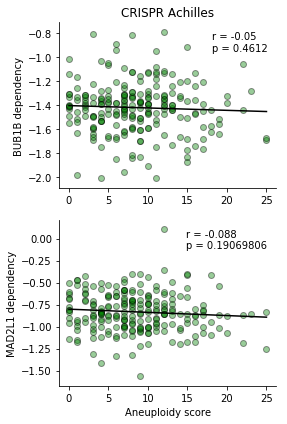

In [173]:
fig,axx = plt.subplots(2,1,figsize=(4,6))

CCLE_ABSOLUTE_combined_table_ = CCLE_ABSOLUTE_combined_table.copy()
CCLE_ABSOLUTE_combined_table_.index = CCLE_ABSOLUTE_combined_table_.loc[:,'DepMap_ID']

sh = set(full_anot.index & gene_effect_crispr_achilles.loc[:,'MAD2L1 (4085)'].dropna().index & CCLE_ABSOLUTE_combined_table_[CCLE_ABSOLUTE_combined_table_.loc[:,'Genome doublings'] == 0].index)

axx[0].scatter(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'],color='green',alpha=.4,edgecolor='black',label=None)

axx[0].set_xlabel('')
plotting.simpleaxis(axx[0])
axx[0].set_ylabel('BUB1B dependency')
axx[1].scatter(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'],color='green',alpha=.4,edgecolor='black',label=None)
plotting.simpleaxis(axx[1])

axx[0].plot(np.unique(full_anot.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot.loc[sh,'num_arm_events'], gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'], 1))(np.unique(full_anot.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'BUB1B (701)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[0].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)



axx[1].plot(np.unique(full_anot.loc[sh,'num_arm_events']), np.poly1d(np.polyfit(full_anot.loc[sh,'num_arm_events'], gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'], 1))(np.unique(full_anot.loc[sh,'num_arm_events'])),color='black')
r,p = scipy.stats.pearsonr(full_anot.loc[sh,'num_arm_events'],gene_effect_crispr_achilles.loc[sh,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
axx[1].legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)





axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('Aneuploidy score')
axx[0].set_title('CRISPR Achilles')
plt.tight_layout()
plt.savefig('fig2f/corr_crispr_achilles.pdf')

In [45]:
public_19Q4_proteincoding_tpm

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,SCYGR3 (112441429),SCYGR7 (112441438),OR8S1 (341568),SCYGR6 (112441431),OR4F29 (729759),EEF1AKMT4 (110599564),TBCE (6905),OOSP4A (112577462),ARHGAP11B (89839),OOSP3 (112577461)
ACH-001097,0.000000,0.000000,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106,2.150560,...,0.0,0.0,0.000000,0.0,0.000000,2.980025,5.132988,0.000000,0.443607,0.000000
ACH-001804,4.934988,0.000000,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474,4.139961,...,0.0,0.0,0.000000,0.0,0.000000,2.283922,4.288359,0.000000,0.475085,0.000000
ACH-000534,0.839960,0.000000,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460,3.157044,...,0.0,0.0,0.000000,0.0,0.000000,1.333424,4.841470,0.000000,3.904966,0.000000
ACH-000742,3.722466,0.000000,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194,3.258519,...,0.0,0.0,0.000000,0.0,0.000000,1.526069,4.494416,0.000000,0.941106,0.000000
ACH-000836,4.632268,0.000000,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193,4.372256,...,0.0,0.0,0.000000,0.0,0.000000,2.983678,4.743623,0.000000,2.650765,0.765535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000904,4.316870,0.028569,5.990955,3.185867,4.846493,0.286881,0.111031,4.799087,4.995485,4.660495,...,0.0,0.0,0.000000,0.0,0.000000,3.831877,5.882888,0.000000,3.063503,0.000000
ACH-000110,5.227279,0.070389,6.764341,3.537296,4.491212,0.150560,1.150560,5.537296,5.776894,4.766065,...,0.0,0.0,0.000000,0.0,0.014355,4.644433,4.605850,0.000000,1.906891,0.000000
ACH-000261,4.447579,0.028569,6.748864,2.650765,4.607626,0.042644,0.687061,6.400367,4.274262,4.828835,...,0.0,0.0,0.097611,0.0,0.000000,2.615887,4.613532,0.000000,2.411426,0.042644
ACH-000031,4.714795,0.028569,6.745910,2.776104,3.621759,0.056584,3.095924,6.936049,4.976822,4.451541,...,0.0,0.0,0.263034,0.0,0.070389,4.476382,4.425594,0.422233,2.014355,0.084064


In [58]:

sh_lines = set(gene_effect_rnai_achilles_.index & public_19Q4_proteincoding_tpm.index)
sh_genes = set(gene_effect_rnai_achilles_.columns & public_19Q4_proteincoding_tpm.columns)

corrs_bub1b_rnai_achilles = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_rnai_achilles_.loc[sh_lines,'BUB1B (701)'])

corrs_mad2l1_rnai_achilles = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_rnai_achilles_.loc[sh_lines,'MAD2L1 (4085)'])




In [63]:

sh_lines = set(gene_effect_rnai_drive_.index & public_19Q4_proteincoding_tpm.index)
sh_genes = set(gene_effect_rnai_drive_.columns & public_19Q4_proteincoding_tpm.columns)

corrs_bub1b_rnai_drive = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_rnai_drive_.loc[sh_lines,'BUB1B (701)'])

corrs_mad2l1_rnai_drive = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_rnai_drive_.loc[sh_lines,'MAD2L1 (4085)'])





In [66]:

sh_lines = set(gene_effect_crispr_achilles.index & public_19Q4_proteincoding_tpm.index)
sh_genes = set(gene_effect_crispr_achilles.columns & public_19Q4_proteincoding_tpm.columns)

corrs_bub1b_crispr_achilles = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_crispr_achilles.loc[sh_lines,'BUB1B (701)'])

corrs_mad2l1_crispr_achilles = public_19Q4_proteincoding_tpm.loc[sh_lines].corrwith(gene_effect_crispr_achilles.loc[sh_lines,'MAD2L1 (4085)'])





In [94]:
print('gene rank of BUB1B dependency with BUB1B expression (rnai achilles): ' + str(corrs_bub1b_rnai_achilles.dropna().sort_values(ascending=False).index.get_loc('BUB1B (701)') + 1))
print('gene rank of MAD2L1 dependency with MAD2L1 expression (rnai achilles): ' + str(corrs_mad2l1_rnai_achilles.dropna().sort_values(ascending=False).index.get_loc('MAD2L1 (4085)') + 1))




gene rank of BUB1B dependency with BUB1B expression (rnai achilles): 3
gene rank of MAD2L1 dependency with MAD2L1 expression (rnai achilles): 210


In [95]:
print('gene rank of BUB1B dependency with BUB1B expression (crispr achilles): ' + str(corrs_bub1b_crispr_achilles.dropna().sort_values(ascending=False).index.get_loc('BUB1B (701)') + 1))
print('gene rank of MAD2L1 dependency with MAD2L1 expression (crispr achilles): ' + str(corrs_mad2l1_crispr_achilles.dropna().sort_values(ascending=False).index.get_loc('MAD2L1 (4085)') + 1))





gene rank of BUB1B dependency with BUB1B expression (crispr achilles): 568
gene rank of MAD2L1 dependency with MAD2L1 expression (crispr achilles): 1635


In [96]:
print('gene rank of BUB1B dependency with BUB1B expression (rnai drive): ' + str(corrs_bub1b_rnai_drive.dropna().sort_values(ascending=False).index.get_loc('BUB1B (701)') + 1))
print('gene rank of MAD2L1 dependency with MAD2L1 expression (rnai drive): ' + str(corrs_mad2l1_rnai_drive.dropna().sort_values(ascending=False).index.get_loc('MAD2L1 (4085)') + 1))





gene rank of BUB1B dependency with BUB1B expression (rnai drive): 39
gene rank of MAD2L1 dependency with MAD2L1 expression (rnai drive): 10
